# 결측치 예측 모델
---
- 결측이 발생하지 않은 컬럼을 바탕으로 결측치를 예측하는 모델을 학습해서 활용하는 방법
- 즉, 결측치가 발생한 컬럼을 새로운 label로 보고, 다른 컬럼들을 feature로 봐서 모델을 만들어 예측하여 결측치를 대체하는 방법


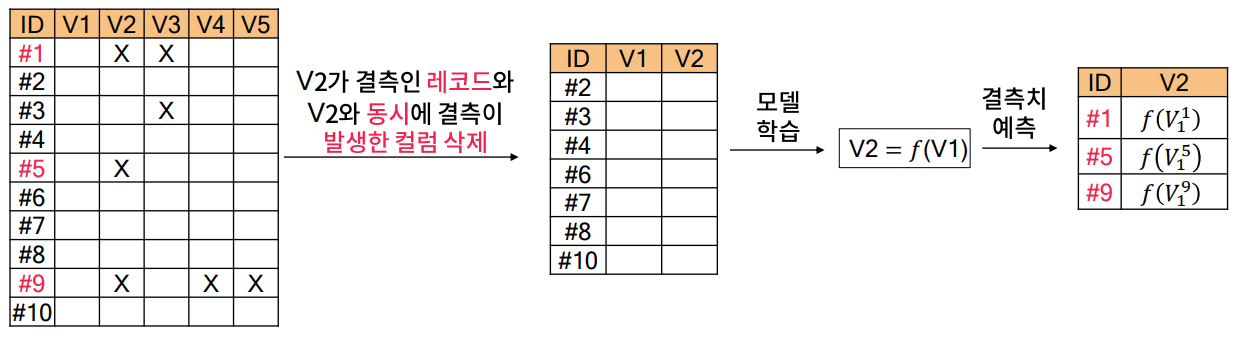

- V2와 동시에 결측이 발생한 V3 ~ V5는 drop
- 살아남은 V1과 V2를 바탕으로 모델 학습 -> 결측치 예측하여 채워넣는 방식

## 결측치 모델의 주의사항
---

- 대부분의 상황에서 활용이 가능하지만, 사용 조건과 단점을 고려해야 한다.
- 사용 조건 및 단점


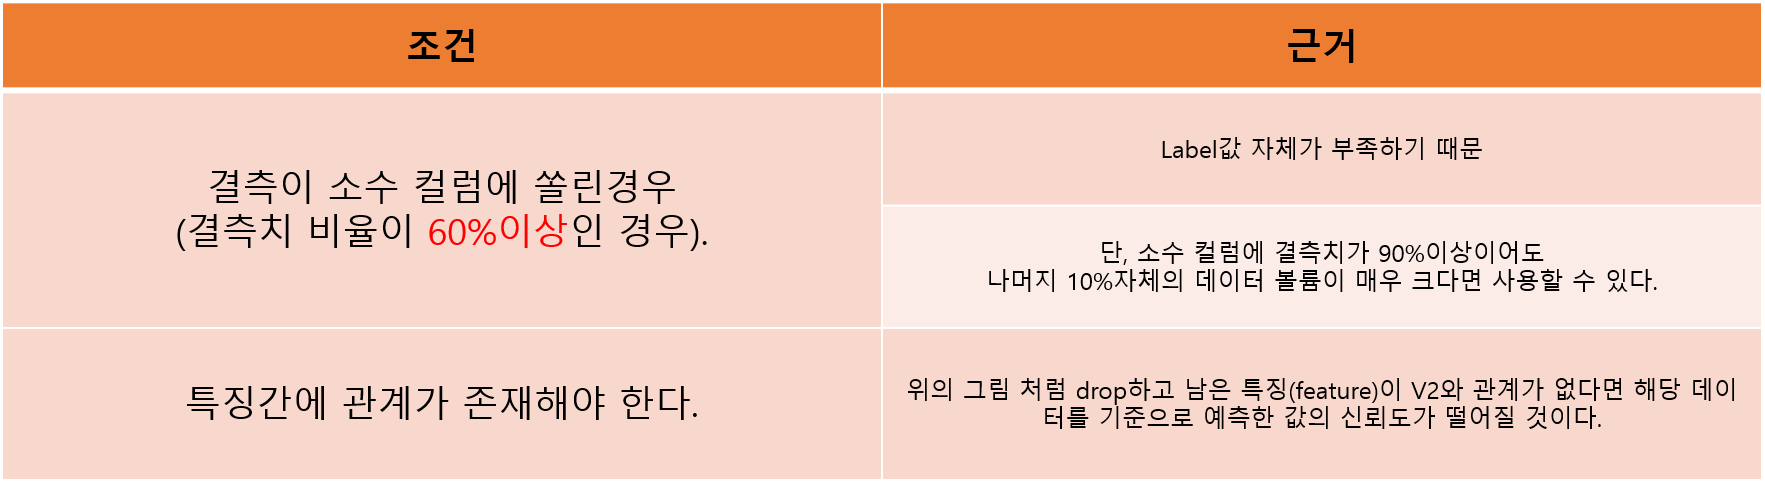

# 관련 문법 : sklearn.impute.KNNImputer
---
- 결측치가 아닌 값만을 사용하여 이웃을 구한 뒤, 이웃인 값들의 대표값으로 결측을 대체하는 결측치 예측 모델

파라미터
- n_neighbors : 이웃의 수 (너무 값이 작으면 결측 대체가 정상적으로 이뤄지지 않는다. 보통 5를 많이 사용한다.)
---
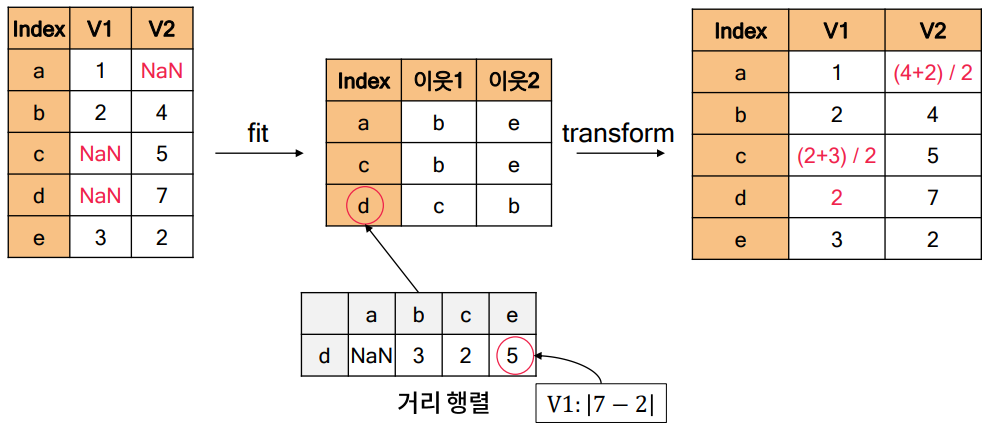

- 1) 결측이 발생한 index a, c, d에 대한 이웃을 찾는다.
- 2) 이웃을 찾는 방식 : 
    - c의 이웃값 찾기 => index c, d에서 결측이 없는 V2의 값으로 판단 -> V2의 index d와 c의 거리 : (7-5) = 2
    - b의 이웃값 찾기 => index b, d에서 결측이 없는 V2의 값으로 판단 -> V2의 index d와 b의 거리 : (7-4) = 3
    - d의 이웃값 찾기 => index d, e에서 결측이 없는 V2의 값으로 판단 -> V2의 index d와 e의 거리 : (7-2) = 5
- 3) 이웃값들의 대표값 찾기
    - d의 이웃값은 c와 b이다. 하지만 c는 NaN이므로 대표값이 되는 b의 2가 입력된다.
    - c의 이웃값은 b와 e이다. 따라서 2와 3의 평균값인 2.5가 입력된다.

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

In [2]:
df = pd.read_csv("mammographic.csv")

In [3]:
# 특징과 라벨 분리
X = df.drop('Output', axis = 1)
Y = df['Output']

In [4]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [5]:
# 열별 결측치 비율 확인 => 그리 높지 않음을 확인
Train_X.isnull().sum() / len(Train_X)

BI-RADS    0.002778
Age        0.005556
Shape      0.036111
Margin     0.054167
Density    0.069444
dtype: float64

In [6]:
# 특징 간 상관 계수 확인 => 평균적으로 약 40 ~ 50%로 매우 높음을 확인
Train_X.corr().sum() / len(Train_X.columns)

BI-RADS    0.418481
Age        0.416480
Shape      0.496927
Margin     0.524265
Density    0.248143
dtype: float64

# KNN Imputer

In [7]:
# KNN Imputer 모델 생성
from sklearn.impute import KNNImputer
KI = KNNImputer(n_neighbors = 5)

# KNN Imputer 학습
KI.fit(Train_X)

# 결측 대체
Train_X = pd.DataFrame(KI.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(KI.transform(Test_X), columns = Test_X.columns)

In [8]:
Train_X.isnull().sum() / len(Train_X)

BI-RADS    0.0
Age        0.0
Shape      0.0
Margin     0.0
Density    0.0
dtype: float64

In [9]:
Test_X.isnull().sum() / len(Test_X)

BI-RADS    0.0
Age        0.0
Shape      0.0
Margin     0.0
Density    0.0
dtype: float64